<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 2 (two) categories. With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

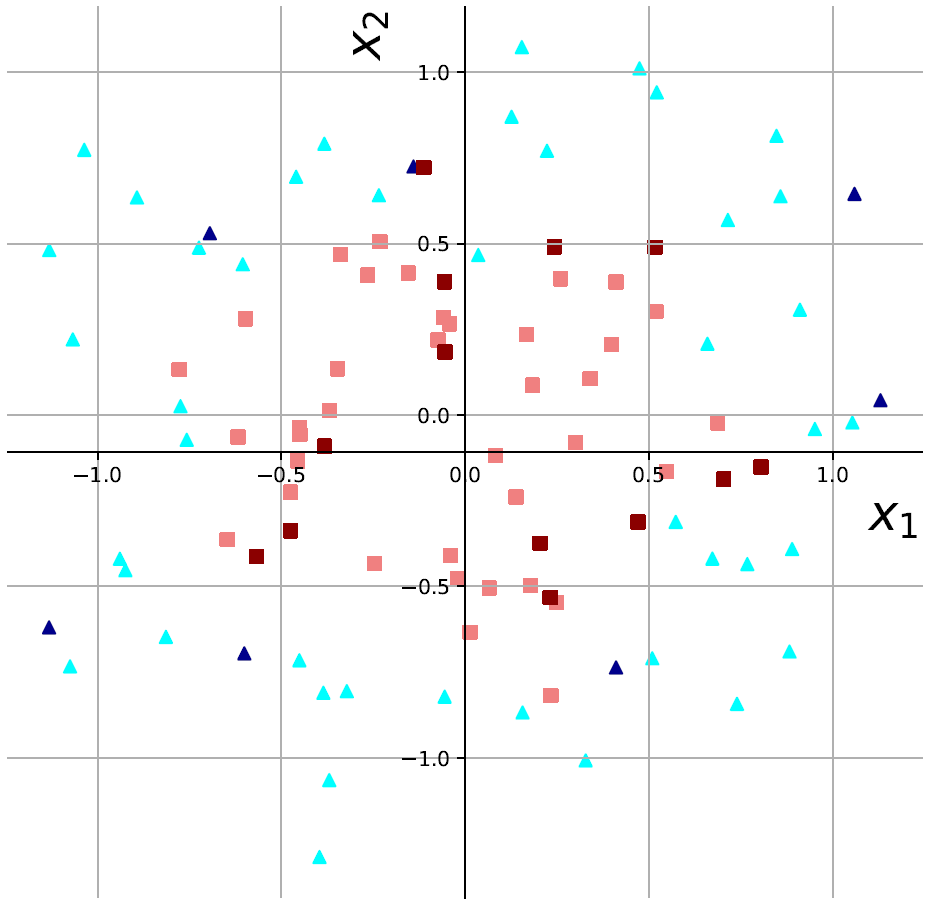

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

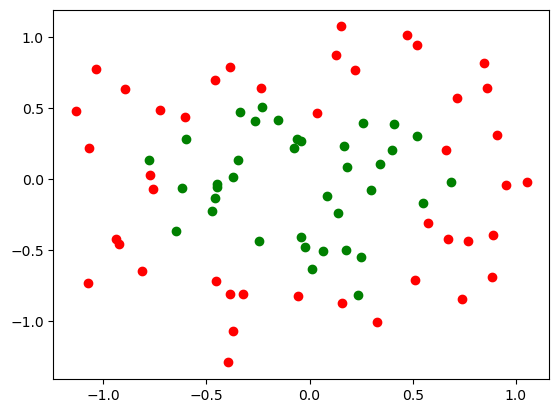

In [3]:
class_to_color = {
    0: 'red',
    1: 'green',
}

for i in range(len(y_train)):
    plt.scatter(X_train[:, 0][i], X_train[:, 1][i], c=class_to_color[y_train[i]])

In [4]:
squared_X_train = np.square(X_train)

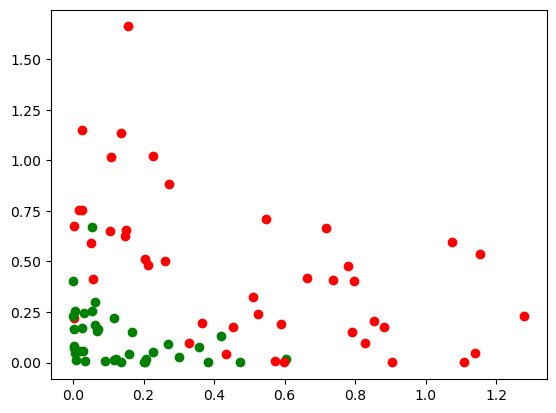

In [5]:
for i in range(len(y_train)):
    plt.scatter(squared_X_train[:, 0][i], squared_X_train[:, 1][i], c=class_to_color[y_train[i]])

In [6]:
class Perceptron:
  def __init__(self, learning_rate, epochs, activation_func):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.activation_func = activation_func
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    self.weights = np.random.randn(n_features)
    self.bias = np.random.randn()

    y_ = np.array([1 if i > 0 else 0 for i in y])

    for _ in range(self.epochs):

      for i in range(len(X)):

        linear_output = np.dot(X[i], self.weights) + self.bias

        y_predicted = self.activation_func(linear_output)

        update = self.learning_rate * (y[i] - y_predicted)

        self.weights += update * X[i]
        self.bias += update

  def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [7]:
def unit_step_func(x):
        return np.where(x>=0, 1, 0)

myPerceptron = Perceptron(0.01, 2000, unit_step_func)


myPerceptron.fit(squared_X_train, y_train)

print(myPerceptron.weights)
print(myPerceptron.bias)

[-0.04525701 -0.0495589 ]
0.025719803206022296


In [8]:
predictions = myPerceptron.predict(np.square(X_test))

In [9]:
def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

In [10]:
print(accuracy(predictions, y_test))

0.9


In [11]:
assert accuracy(predictions, y_test) > 0.55

In [12]:
assert accuracy(predictions, y_test) > 0.60